In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C


In [4]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [6]:
df_test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [9]:
df_train['Family'] = (df_train.SibSp * df_train.Parch) + 1

In [10]:
df_test['Family'] = (df_test.SibSp * df_test.Parch) + 1

In [11]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
df_train['Fare'] = pd.cut(df_train.Fare, bins=[0, 8, 31.1, 150, 520], labels=[0, 1, 2, 3], include_lowest=True)

In [13]:
df_train.Fare.value_counts()

1    428
0    241
2    193
3     29
Name: Fare, dtype: int64

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    category
 7   Embarked  889 non-null    object  
 8   Family    891 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(2)
memory usage: 56.9+ KB


In [15]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df_train['Age'] = pd.cut(df_train.Age, bins=[0, 14, 24, 64, 100], labels=[0, 1, 2, 3], include_lowest=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       714 non-null    category
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    category
 7   Embarked  889 non-null    object  
 8   Family    891 non-null    int64   
dtypes: category(2), int64(5), object(2)
memory usage: 51.0+ KB


In [53]:
df_test['Fare'] = pd.cut(df_test.Fare, bins=[0, 8, 31.1, 150, 520], labels=[0, 1, 2, 3], include_lowest=True)

In [54]:
df_test['Age'] = pd.cut(df_test.Age, bins=[0, 14, 24, 64, 100], labels=[0, 1, 2, 3], include_lowest=True)

In [18]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [55]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   SibSp       891 non-null    int64
 3   Parch       891 non-null    int64
 4   Family      891 non-null    int64
 5   Sex_male    891 non-null    uint8
 6   Age_1       891 non-null    uint8
 7   Age_2       891 non-null    uint8
 8   Age_3       891 non-null    uint8
 9   Fare_1      891 non-null    uint8
 10  Fare_2      891 non-null    uint8
 11  Fare_3      891 non-null    uint8
 12  Embarked_Q  891 non-null    uint8
 13  Embarked_S  891 non-null    uint8
dtypes: int64(5), uint8(9)
memory usage: 42.8 KB


In [21]:
X = df_train.drop('Survived', axis = 1)

In [22]:
y = df_train.Survived

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   SibSp       418 non-null    int64
 2   Parch       418 non-null    int64
 3   Family      418 non-null    int64
 4   Sex_male    418 non-null    uint8
 5   Embarked_Q  418 non-null    uint8
 6   Embarked_S  418 non-null    uint8
 7   Age_1       418 non-null    uint8
 8   Age_2       418 non-null    uint8
 9   Age_3       418 non-null    uint8
 10  Fare_1      418 non-null    uint8
 11  Fare_2      418 non-null    uint8
 12  Fare_3      418 non-null    uint8
dtypes: int64(4), uint8(9)
memory usage: 16.9 KB


In [25]:
X_train.describe()

,Pclass,SibSp,Parch,Family,Sex_male,Age_1,Age_2,Age_3,Fare_1,Fare_2,Fare_3,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.519663,0.391854,1.571629,0.651685,0.220506,0.483146,0.011236,0.485955,0.228933,0.028090,0.078652,0.728933
std,0.843659,1.118647,0.812761,2.006441,0.476771,0.414879,0.500067,0.105477,0.500154,0.420441,0.165346,0.269384,0.444823
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,8.000000,6.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_test.Fare.fillna(df_test.Fare.median(), axis = 0, inplace=True)

In [27]:
df_test.Age.fillna(df_test.Age.median(), inplace=True)

In [51]:
X_train

,Pclass,SibSp,Parch,Family,Sex_male,Age_1,Age_2,Age_3,Fare_1,Fare_2,Fare_3,Embarked_Q,Embarked_S
368,3,0,0,1,0,0,0,0,0,0,0,1,0
542,3,4,2,9,0,0,0,0,0,1,0,0,1
49,3,1,0,1,0,1,0,0,1,0,0,0,1
667,3,0,0,1,1,0,0,0,0,0,0,0,1
297,1,1,2,3,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,3,0,0,1,1,0,0,0,0,0,0,0,1
744,3,0,0,1,1,0,1,0,0,0,0,0,1
265,2,0,0,1,1,0,1,0,1,0,0,0,1
337,1,0,0,1,0,0,1,0,0,1,0,0,0


In [28]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_leaf=5, min_samples_split=10, max_leaf_nodes=5, random_state=5)

m.fit(X_train, y_train)
y_pred_rfc = m.predict(X_test)

m.score(X_test, y_test)

0.8491620111731844

In [29]:
(y_test != y_pred_rfc).sum()

27

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(base_estimator=m, n_estimators=50, learning_rate=0.01, random_state=5)
%time ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
accuracy_score(y_train, y_train_pred)

Wall time: 16.2 s


0.8061797752808989

In [31]:
accuracy_score(y_test, y_test_pred)

0.8491620111731844

In [32]:
ada.feature_importances_

array([0.21607956, 0.04993703, 0.0628022 , 0.05896659, 0.46818614,
       0.00474386, 0.00990243, 0.00105086, 0.00917327, 0.07557426,
       0.00463423, 0.00493632, 0.03401326])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

rf = RandomForestClassifier()

params = {'n_estimators': [50, 100, 200, 300, 350],
          'max_depth': [3,4,5,7, 10,15,20],
          'criterion':['entropy', 'gini'],
          'min_samples_leaf' : [1, 2, 3, 4, 5, 10],
          'max_features':['auto'],
          'min_samples_split': [3, 5, 10, 15, 20],
          'max_leaf_nodes':[2,3,4,5],
          }

clf = GridSearchCV(estimator=rf,param_grid=params,cv=10, n_jobs=-1)

%time clf.fit(X_train, y_train.ravel())

print(clf.best_estimator_)
print(clf.best_score_)

rf_best = clf.best_estimator_

# Predict from the test set
y_pred_grid = clf.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred_grid))

# Print the confusion matrix
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred_grid))

Wall time: 1h 4min 14s
RandomForestClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=10)
0.8061228482003131
Accuracy:  0.8379888268156425

Confusion Matrix

[[105   5]
 [ 24  45]]


(y_test != y_pred_grid).sum()

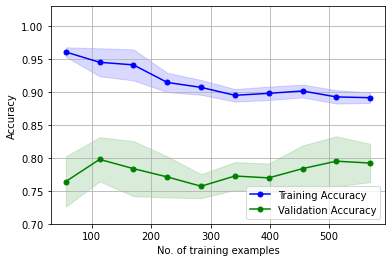

In [34]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

pipe_rf = make_pipeline(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=5))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=5, n_jobs=-1, random_state=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.show()


In [35]:
pipe_rf.fit(X_train, y_train)
pipe_rf.predict(X_test)
pipe_rf.score(X_test, y_test)

0.7597765363128491

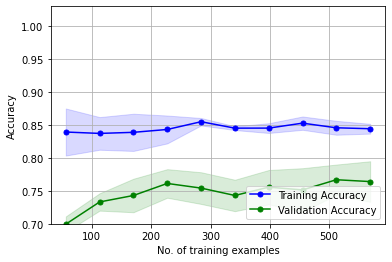

In [37]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5, p=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=5, n_jobs=-1, random_state=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.show()


In [38]:
pipe_knn.fit(X_train, y_train)
pipe_knn.predict(X_test)
pipe_knn.score(X_test, y_test)

0.8268156424581006

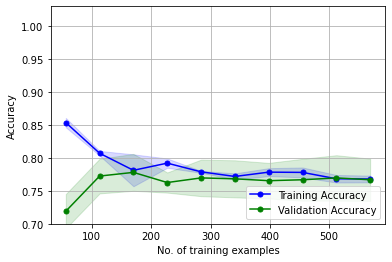

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C=0.001, class_weight='balanced', random_state=5))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=5, n_jobs=-1, random_state=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.show()


In [40]:
pipe_lr.fit(X_train, y_train)
pipe_lr.predict(X_test)
pipe_lr.score(X_test, y_test)

0.770949720670391

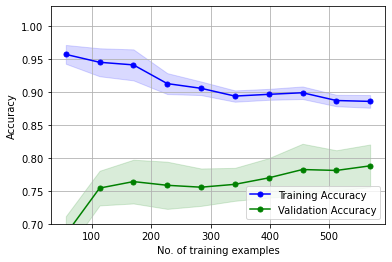

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.svm import SVC

pipe_svc = make_pipeline(preprocessing.StandardScaler(), SVC(kernel='rbf', C=3, gamma=0.3, class_weight='balanced', random_state=5))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1,10), cv=5, n_jobs=-1, random_state=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('No. of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.show()


In [42]:
pipe_svc.fit(X_train, y_train)
pipe_svc.predict(X_test)
pipe_svc.score(X_test, y_test)

0.7653631284916201

In [43]:
(y_test != pipe_svc.predict(X_test)).sum()

42

In [44]:
df_test.reset_index(level=0, inplace=True)
df_test.drop('index', axis=1, inplace=True)

In [45]:
df_test.fillna(df_test.median(), inplace=True)

In [57]:
predictions = ada.predict(df_test)

In [58]:
df = pd.read_csv('test.csv')

In [59]:
output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)